# Importing

In [1]:
# from __future__ import absolute_import, division, print_function, unicode_literals

import tensorflow as tf

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, Flatten, Dropout, MaxPooling2D
from tensorflow.keras.preprocessing.image import ImageDataGenerator

import os
import shutil
import numpy as np
import matplotlib.pyplot as plt

import pydot
import graphviz

# Making directories

In [2]:
#checking ls
os.listdir("./")

['.git',
 '.ipynb_checkpoints',
 '1stmodel',
 '2ndmodel',
 '3rdmodel',
 '4thmodel',
 '5thmodel.h5',
 '5thmodel.png',
 'custom_pred',
 'model.png',
 'pred',
 'Scenery-Copy1.ipynb',
 'Scenery.ipynb',
 'train',
 'Untitled.ipynb',
 'val']

In [3]:
#directories
train_dir = os.path.join("./", 'train')
validation_dir = os.path.join("./", 'val')

In [4]:
train_dir

'./train'

In [5]:
#6 sub dir
train_building_dir = os.path.join(train_dir, 'building')  # directory with our training cat pictures
train_forest_dir = os.path.join(train_dir, 'forest')  # directory with our training dog pictures
train_glacier_dir = os.path.join(train_dir, 'glacier')  # directory with our training cat pictures
train_mountain_dir = os.path.join(train_dir, 'mountain')  # directory with our training dog pictures
train_sea_dir = os.path.join(train_dir, 'sea')  # directory with our training cat pictures
train_street_dir = os.path.join(train_dir, 'street')  # directory with our training dog pictures

validation_building_dir = os.path.join(validation_dir, 'building')  # directory with our training cat pictures
validation_forest_dir = os.path.join(validation_dir, 'forest')  # directory with our training dog pictures
validation_glacier_dir = os.path.join(validation_dir, 'glacier')  # directory with our training cat pictures
validation_mountain_dir = os.path.join(validation_dir, 'mountain')  # directory with our training dog pictures
validation_sea_dir = os.path.join(validation_dir, 'sea')  # directory with our training cat pictures
validation_street_dir = os.path.join(validation_dir, 'street')  # directory with our training dog pictures


# Total numbers

In [6]:
#total numbers
num_building_tr = len(os.listdir(train_building_dir))
num_forest_tr = len(os.listdir(train_forest_dir))
num_glacier_tr = len(os.listdir(train_glacier_dir))
num_mountain_tr = len(os.listdir(train_mountain_dir))
num_sea_tr = len(os.listdir(train_sea_dir))
num_street_tr = len(os.listdir(train_street_dir))

num_building_val = len(os.listdir(validation_building_dir))
num_forest_val = len(os.listdir(validation_forest_dir))
num_glacier_val = len(os.listdir(validation_glacier_dir))
num_mountain_val = len(os.listdir(validation_mountain_dir))
num_sea_val = len(os.listdir(validation_sea_dir))
num_street_val = len(os.listdir(validation_street_dir))

total_train = num_building_tr + num_forest_tr + num_glacier_tr + num_mountain_tr + num_sea_tr + num_street_tr 
total_val = num_building_val + num_forest_val + num_glacier_val + num_mountain_val + num_sea_val + num_street_val

In [7]:
#print all  total numbers
print("num_building_tr ",num_building_tr)
print("num_forest_tr ",num_forest_tr)
print("num_glacier_tr ",num_glacier_tr)
print("num_mountain_tr",num_mountain_tr)
print("num_sea_tr ",num_sea_tr)
print("num_street_tr ",num_street_tr)

print("num_building_val ",num_building_val)
print("num_forest_val ",num_forest_val)
print("num_glacier_val ",num_glacier_val)
print("num_mountain_val ",num_mountain_val)
print("num_sea_val ",num_sea_val)
print("num_street_val ",num_street_val)

print("total_train ",total_train)
print("total_val ",total_val)

num_building_tr  2191
num_forest_tr  2271
num_glacier_tr  2404
num_mountain_tr 2512
num_sea_tr  2274
num_street_tr  2382
num_building_val  437
num_forest_val  474
num_glacier_val  553
num_mountain_val  525
num_sea_val  510
num_street_val  501
total_train  14034
total_val  3000


# Settings

In [8]:
#setting
batch_size = 128
epochs = 30
IMG_HEIGHT = 150
IMG_WIDTH = 150
class_names = ['building', 'forest', 'glacier', 'mountain', 'sea',
               'street']

# Augmentation

In [9]:
#train
image_gen_train = ImageDataGenerator(
                    rescale=1./255,
                    rotation_range=45,
                    width_shift_range=.15,
                    height_shift_range=.15,
                    horizontal_flip=True,
                    zoom_range=0.5
                    )
train_data_gen = image_gen_train.flow_from_directory(batch_size=batch_size,
                                                     directory=train_dir,
                                                     shuffle=True,
                                                     target_size=(IMG_HEIGHT, IMG_WIDTH),
                                                     class_mode='categorical')

Found 14034 images belonging to 6 classes.


In [10]:
#val
image_gen_val = ImageDataGenerator(rescale=1./255)
val_data_gen = image_gen_val.flow_from_directory(batch_size=batch_size,
                                                 directory=validation_dir,
                                                 target_size=(IMG_HEIGHT, IMG_WIDTH),
                                                 class_mode='categorical')

Found 3000 images belonging to 6 classes.


# Image sample

In [11]:
#getting image samples
sample_training_images, _ = next(train_data_gen)

In [12]:
# This function will plot images in the form of a grid with 1 row and 5 columns where images are placed in each column.
def plotImages(images_arr):
    fig, axes = plt.subplots(1, 5, figsize=(20,20))
    axes = axes.flatten()
    for img, ax in zip( images_arr, axes):
        ax.imshow(img)
        ax.axis('off')
    plt.tight_layout()
    plt.show()

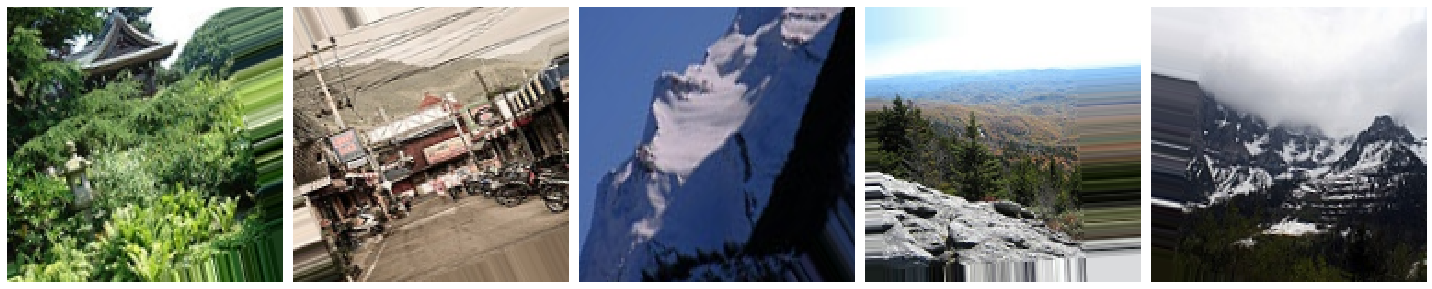

In [13]:
#plotting image
plotImages(sample_training_images[:5])

# Model

In [14]:
#load model
model = tf.keras.models.load_model('4thmodel/4thmodel.h5')

In [14]:
#load model from json, you have to load wieght too
json_file = open('2ndmodel/2ndmodel.json', 'r')
loaded_model_json = json_file.read()
json_file.close()
model1 = tf.keras.models.model_from_json(loaded_model_json)

In [ ]:
#if you load a model, skip create, compile, prediction before training, and training

In [73]:
#creating a model

model = Sequential([
    
])

In [74]:
#compiling
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Model visualization

In [15]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_12 (Conv2D)           (None, 150, 150, 32)      896       
_________________________________________________________________
max_pooling2d_12 (MaxPooling (None, 75, 75, 32)        0         
_________________________________________________________________
conv2d_13 (Conv2D)           (None, 75, 75, 64)        18496     
_________________________________________________________________
max_pooling2d_13 (MaxPooling (None, 37, 37, 64)        0         
_________________________________________________________________
conv2d_14 (Conv2D)           (None, 37, 37, 128)       73856     
_________________________________________________________________
max_pooling2d_14 (MaxPooling (None, 18, 18, 128)       0         
_________________________________________________________________
conv2d_15 (Conv2D)           (None, 18, 18, 256)      

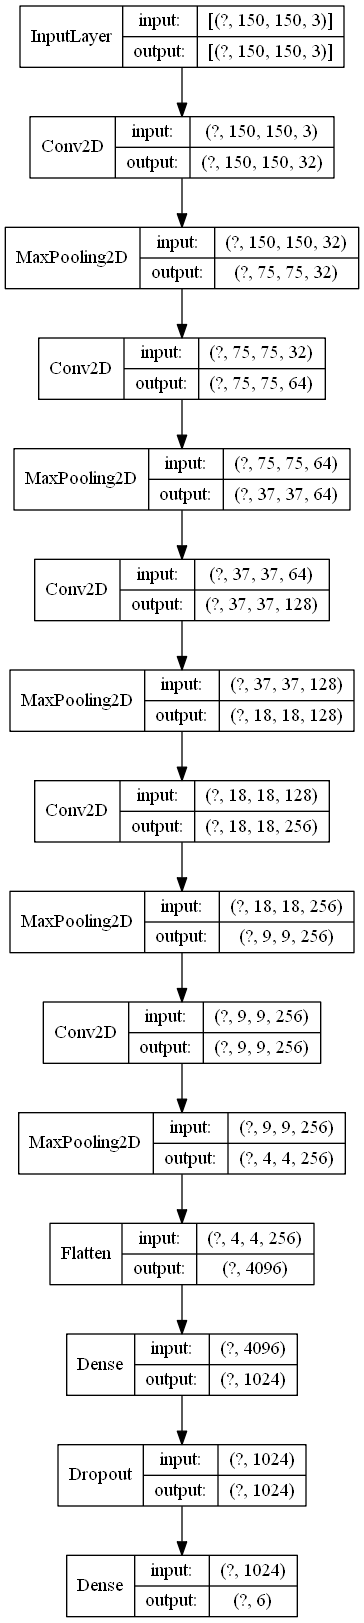

In [16]:
tf.keras.utils.plot_model(
    model,
    show_shapes=True,
    show_layer_names=False,
    rankdir='TB',
    expand_nested=False,
    dpi=96
)

# Prediction (before training)

In [31]:
pred_dir = os.path.join("./", 'pred')
num_pred = len(os.listdir(pred_dir))
image_gen_pred = ImageDataGenerator(rescale=1./255)
pred_data_gen = image_gen_pred.flow_from_directory(batch_size=batch_size,
                                                 directory="./",
                                                 target_size=(IMG_HEIGHT, IMG_WIDTH),
                                                 class_mode='categorical')

Found 24344 images belonging to 8 classes.


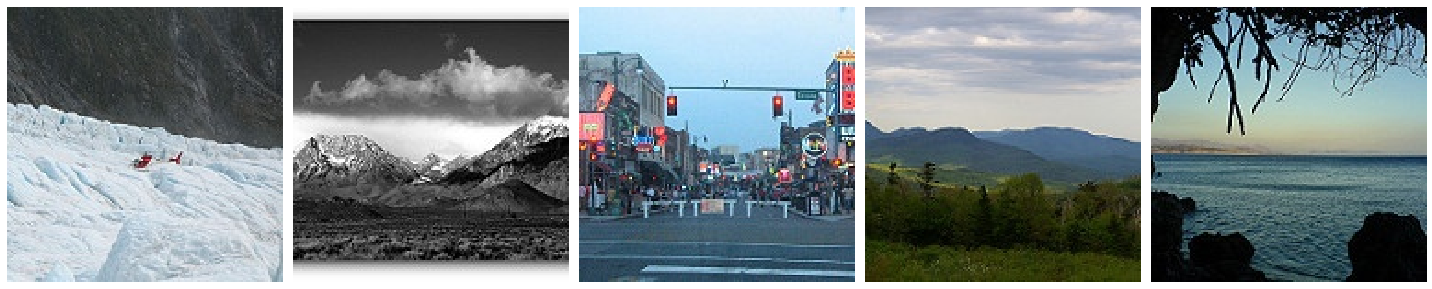

building
building
building
building
building


In [32]:
sample_pred_images, _ = next(pred_data_gen)
x = sample_pred_images[:5]
plotImages(x)
y = model.predict_classes(x)
for i in range(5):
    classification = class_names[y[i]]
    print(classification)

# Training

In [18]:
callback = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=5,min_delta=0.001)

In [19]:
history = model.fit_generator(
    train_data_gen,
    steps_per_epoch=total_train // batch_size,
    epochs=100,
    validation_data=val_data_gen,
    validation_steps=total_val // batch_size,
    callbacks=[callback]
)

Epoch 1/100
109/109 [==============================] - 108s 995ms/step - loss: 0.4284 - accuracy: 0.8479 - val_loss: 0.4058 - val_accuracy: 0.8628
Epoch 2/100
109/109 [==============================] - 105s 961ms/step - loss: 0.4184 - accuracy: 0.8498 - val_loss: 0.3702 - val_accuracy: 0.8651
Epoch 3/100
109/109 [==============================] - 119s 1s/step - loss: 0.3984 - accuracy: 0.8539 - val_loss: 0.4830 - val_accuracy: 0.8346
Epoch 4/100
109/109 [==============================] - 109s 997ms/step - loss: 0.4205 - accuracy: 0.8502 - val_loss: 0.4037 - val_accuracy: 0.8624
Epoch 5/100
109/109 [==============================] - 125s 1s/step - loss: 0.4008 - accuracy: 0.8547 - val_loss: 0.3750 - val_accuracy: 0.8716
Epoch 6/100
109/109 [==============================] - 118s 1s/step - loss: 0.4046 - accuracy: 0.8541 - val_loss: 0.3635 - val_accuracy: 0.8757
Epoch 7/100
109/109 [==============================] - 122s 1s/step - loss: 0.3968 - accuracy: 0.8555 - val_loss: 0.4797 - val_

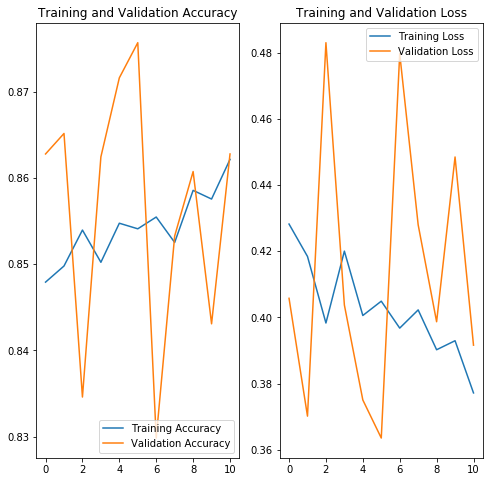

In [32]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(11)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

In [21]:
#save model
model.save("asdmodel.h5")

# Prediction

In [22]:
pred_dir = os.path.join("./", 'pred')
num_pred = len(os.listdir(pred_dir))
image_gen_pred = ImageDataGenerator(rescale=1./255)
pred_data_gen = image_gen_pred.flow_from_directory(batch_size=batch_size,
                                                 directory="./",
                                                 target_size=(IMG_HEIGHT, IMG_WIDTH),
                                                 class_mode='categorical')

Found 24343 images belonging to 10 classes.


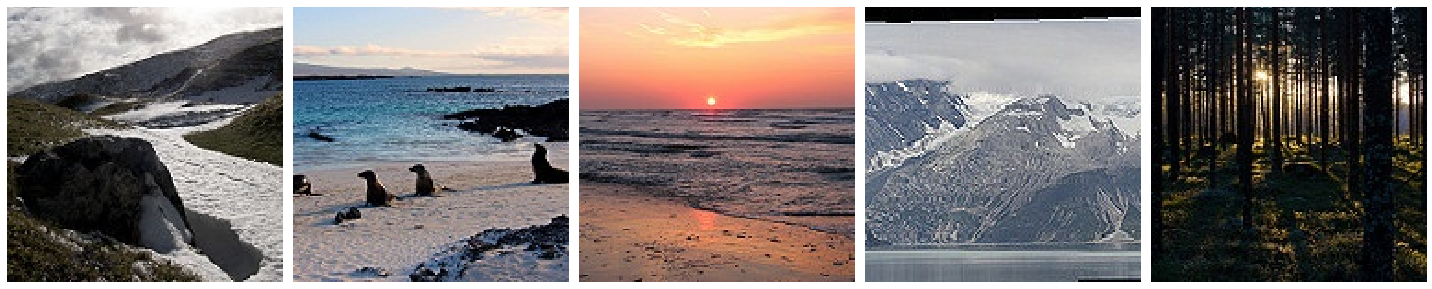

sea
sea
sea
building
forest


In [28]:
sample_pred_images, _ = next(pred_data_gen)
x = sample_pred_images[:5]
plotImages(x)
y = model.predict_classes(x)
for i in range(5):
    classification = class_names[y[i]]
    print(classification)

# User input

In [29]:
custom_pred_dir = os.path.join("./", 'custom_pred/a')
num_custom_pred = len(os.listdir(custom_pred_dir))
image_gen_custom_pred = ImageDataGenerator(rescale=1./255)
custom_pred_data_gen = image_gen_custom_pred.flow_from_directory(batch_size=batch_size,
                                                 directory="./custom_pred",
                                                 target_size=(IMG_HEIGHT, IMG_WIDTH),
                                                 class_mode='categorical')

Found 5 images belonging to 1 classes.


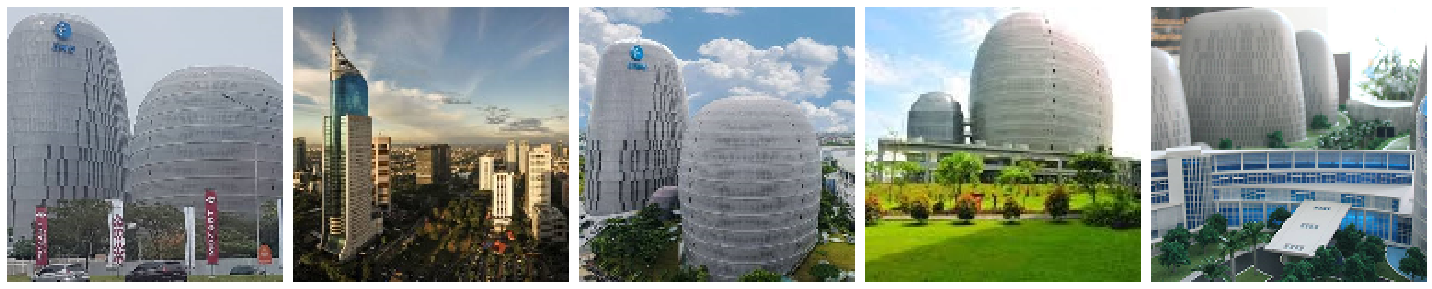

building
building
building
building
building


In [31]:
sample_custom_pred_images, _ = next(custom_pred_data_gen)
x = sample_custom_pred_images[:5]
plotImages(x)
y = model.predict_classes(x)
for i in range(5):
    classification = class_names[y[i]]
    print(classification)